In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

exps_path = os.path.join('results', 'ppo_custom')

def draw_res(exp_name, exp_file): 
    csv_file = os.path.join(exps_path, exp_name, exp_file)
    # Cargar el CSV
    df = pd.read_csv(csv_file)

    # Comprobar que las columnas necesarias existen
    required_columns = {'timestep', 'avg_reward', 'policy_loss', 'value_loss', 'entropy', 'entropy_coef'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"El archivo CSV debe contener las columnas: {required_columns}")

    # Calcular la loss según la fórmula
    df['loss'] = df['policy_loss'] + 0.5 * df['value_loss'] - df['entropy_coef'] * df['entropy']

    # Crear la figura con dos subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Primer gráfico: avg_reward vs timestep
    axs[0].plot(df['timestep'], df['avg_reward'], label='Average Reward', color='blue')
    axs[0].set_ylabel('Average Reward')
    axs[0].set_title('Average Reward vs Timestep')
    axs[0].grid(True)
    axs[0].legend()

    # Segundo gráfico: loss vs timestep
    axs[1].plot(df['timestep'], df['loss'], label='Loss', color='red')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Timestep')
    axs[1].set_title('Loss vs Timestep')
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

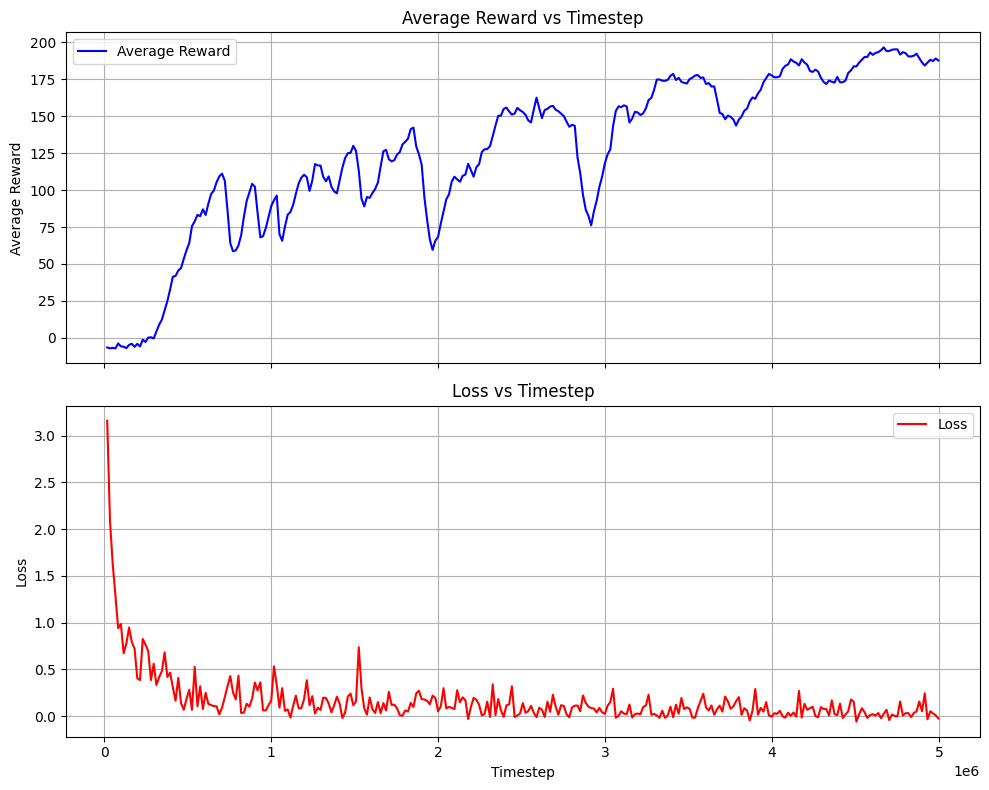

In [3]:
draw_res('pong', 'ppo_training_log_pong.csv')

In [ ]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def draw(event_path, title):
  # Cargar el archivo
  event_acc = EventAccumulator(event_path)
  event_acc.Reload()

  # Métricas que quieres visualizar
  metrics = [
      "rollout/ep_rew_mean",
      # "rollout/ep_len_mean",
      # "train/entropy_loss",
      "train/loss",
      # "train/approx_kl",
      # "train/value_loss",
      "train/explained_variance"
  ]

  # Graficar
  fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 8))
  for i, tag in enumerate(metrics):
      if tag in event_acc.Tags()['scalars']:
          events = event_acc.Scalars(tag)
          steps = [e.step for e in events]
          values = [e.value for e in events]
          axs[i].plot(steps, values)
          axs[i].set_title(tag)
          axs[i].set_xlabel("Timestep")
          axs[i].set_ylabel("Value")
          axs[i].grid(True)
      else:
          axs[i].text(0.5, 0.5, f"{tag} no encontrado", ha='center')

  plt.tight_layout()
  fig.suptitle(title, fontsize=16, y=1.02)
  plt.show()

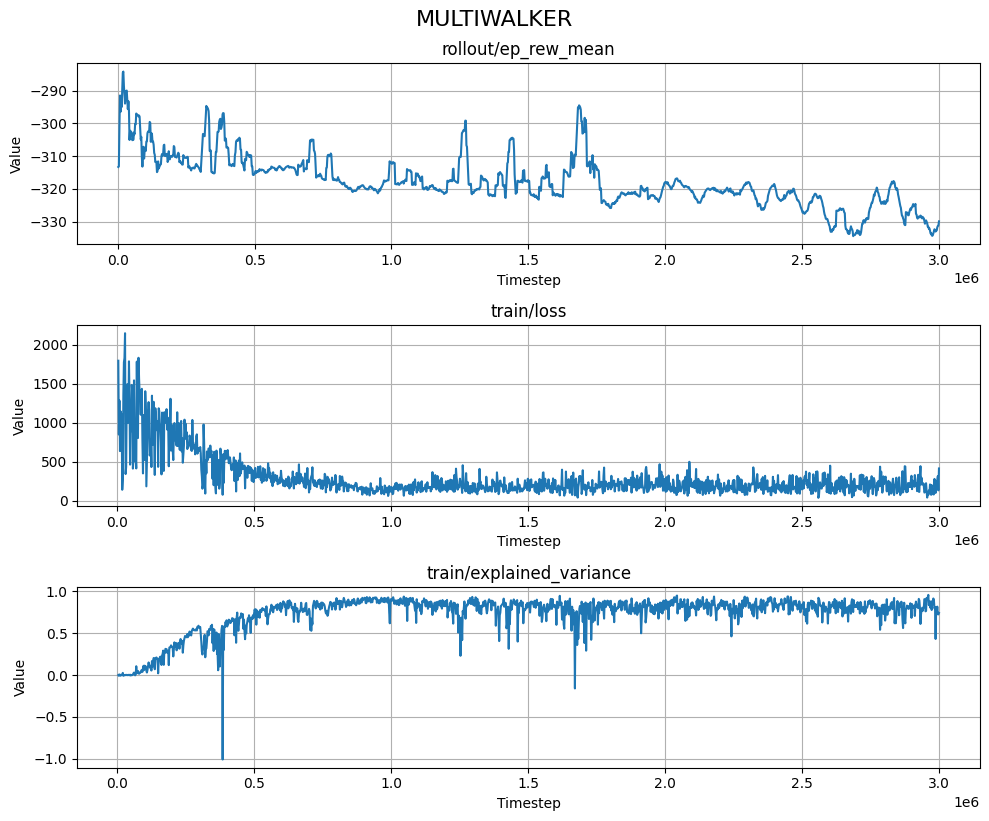

In [ ]:
draw('/content/tfevents_multiwalker.4', 'MULTIWALKER')

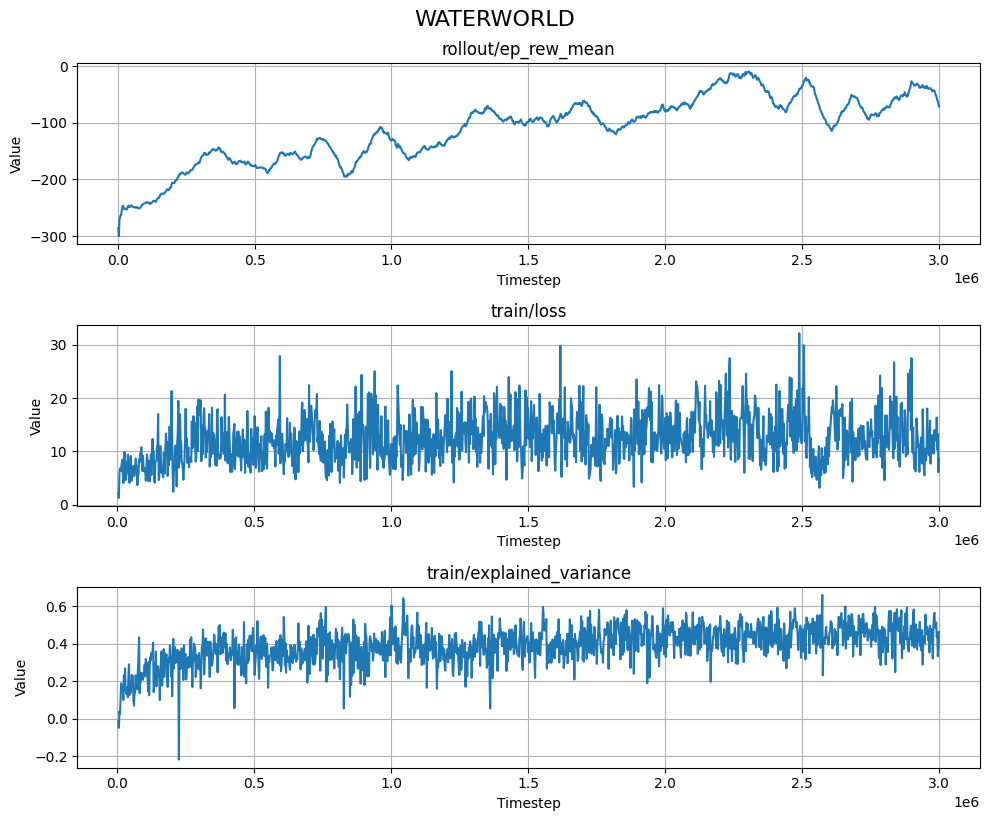

In [ ]:
draw('/content/tfevents_waterworld.3', 'WATERWORLD')

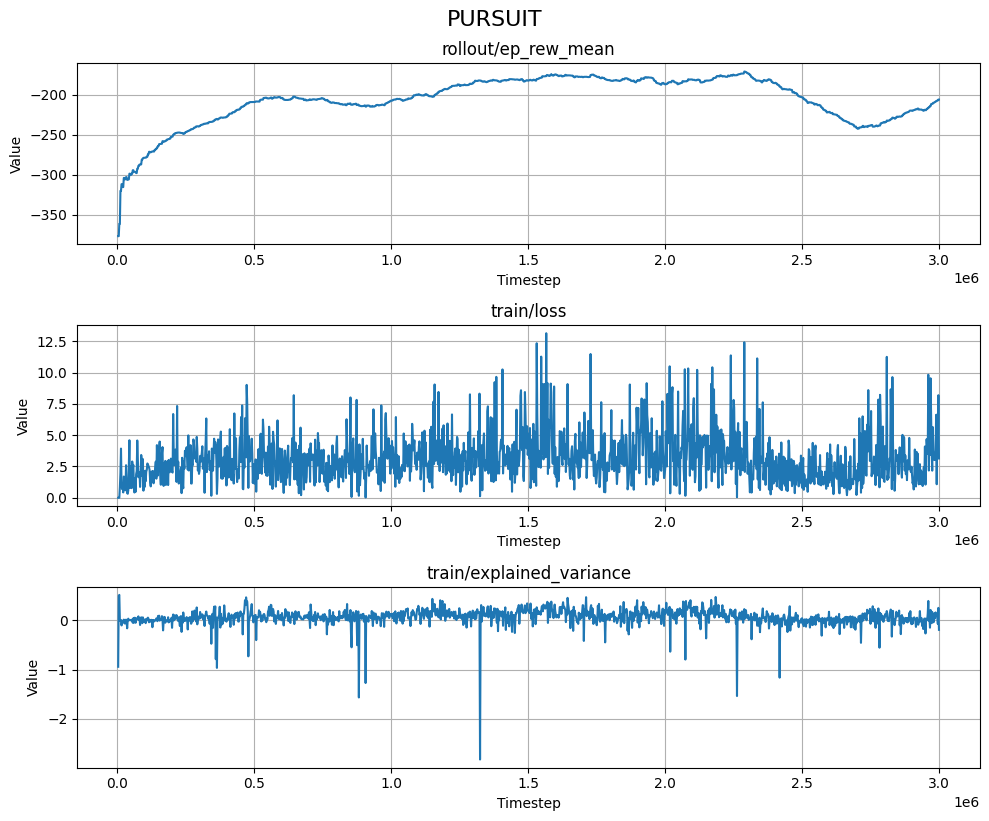

In [ ]:
draw('/content/tfevents_pursuit.5', 'PURSUIT')

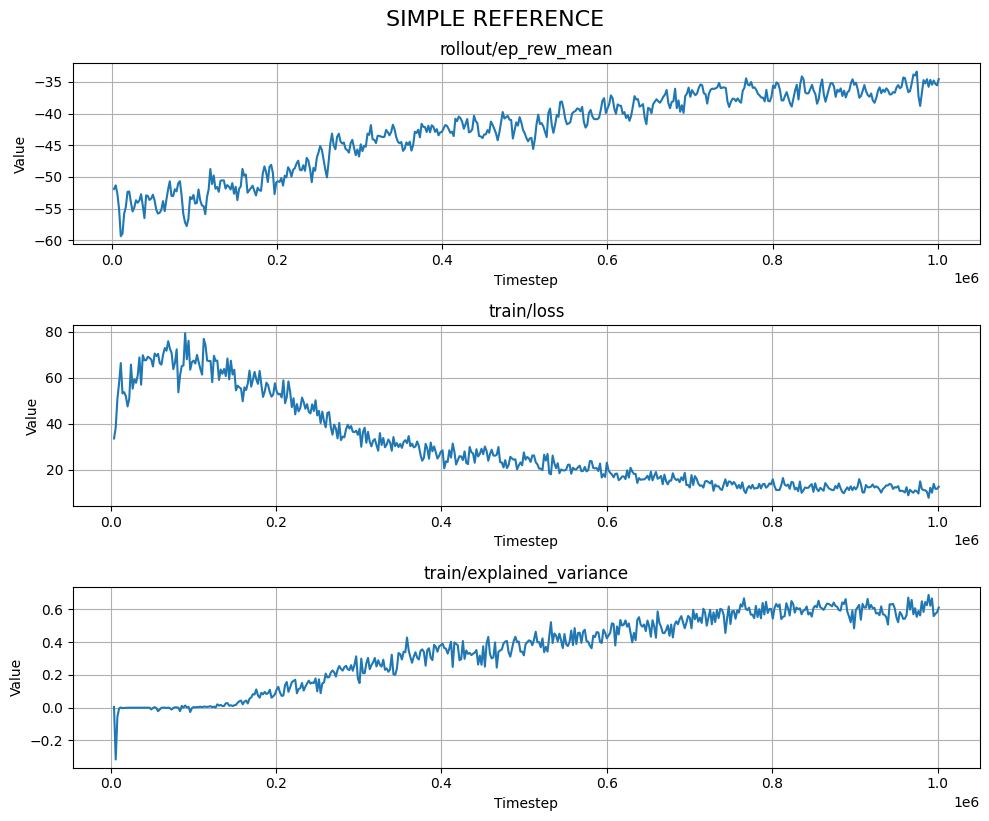

In [ ]:
draw('/content/tfevents_simple_reference.0', 'SIMPLE REFERENCE')

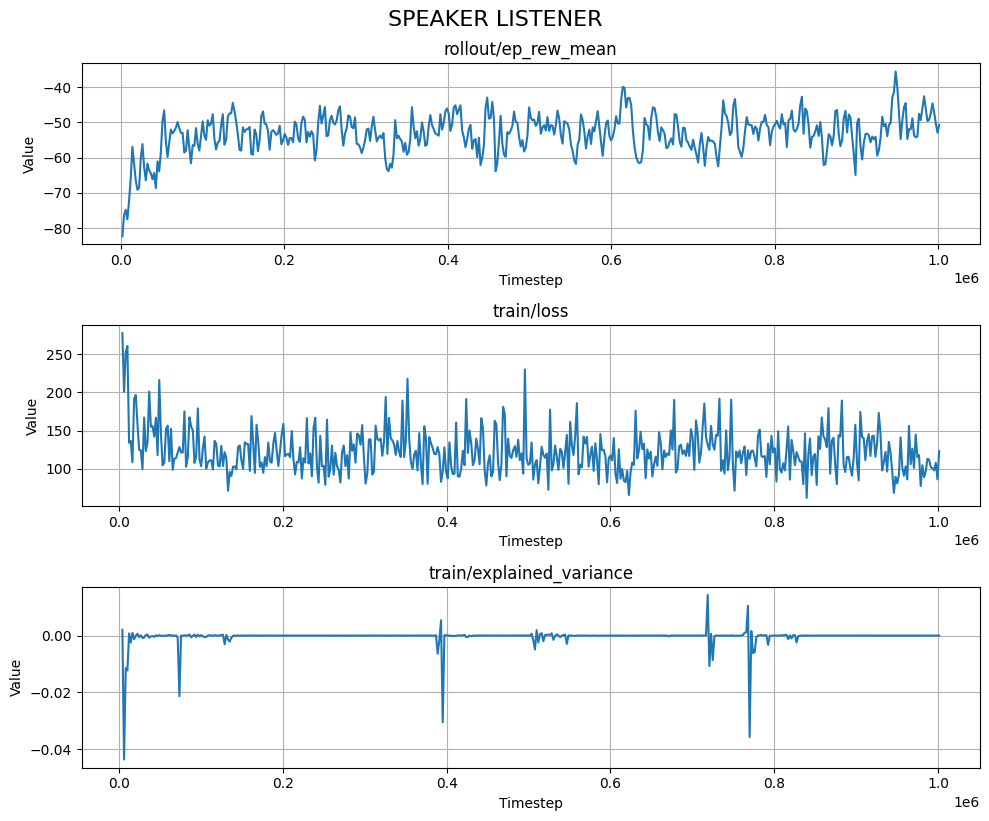

In [ ]:
draw('/content/tfevents_speaker_listener.1', 'SPEAKER LISTENER')

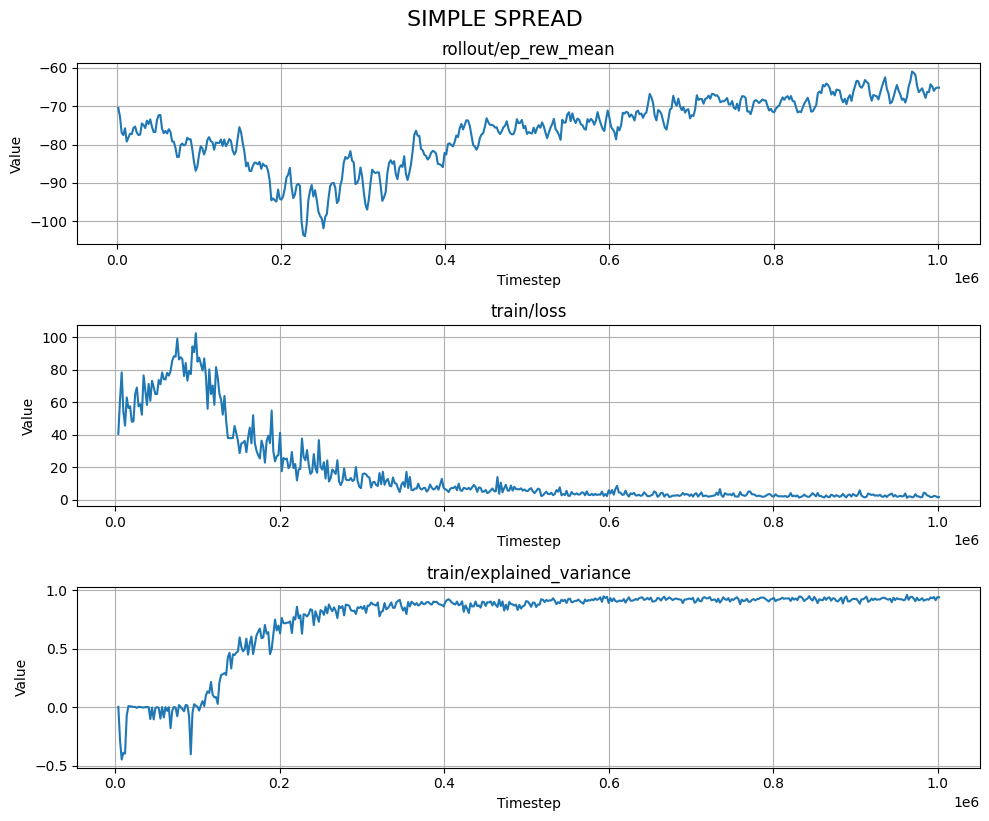

In [ ]:
draw('/content/tfevents_simple_spread.2', 'SIMPLE SPREAD')

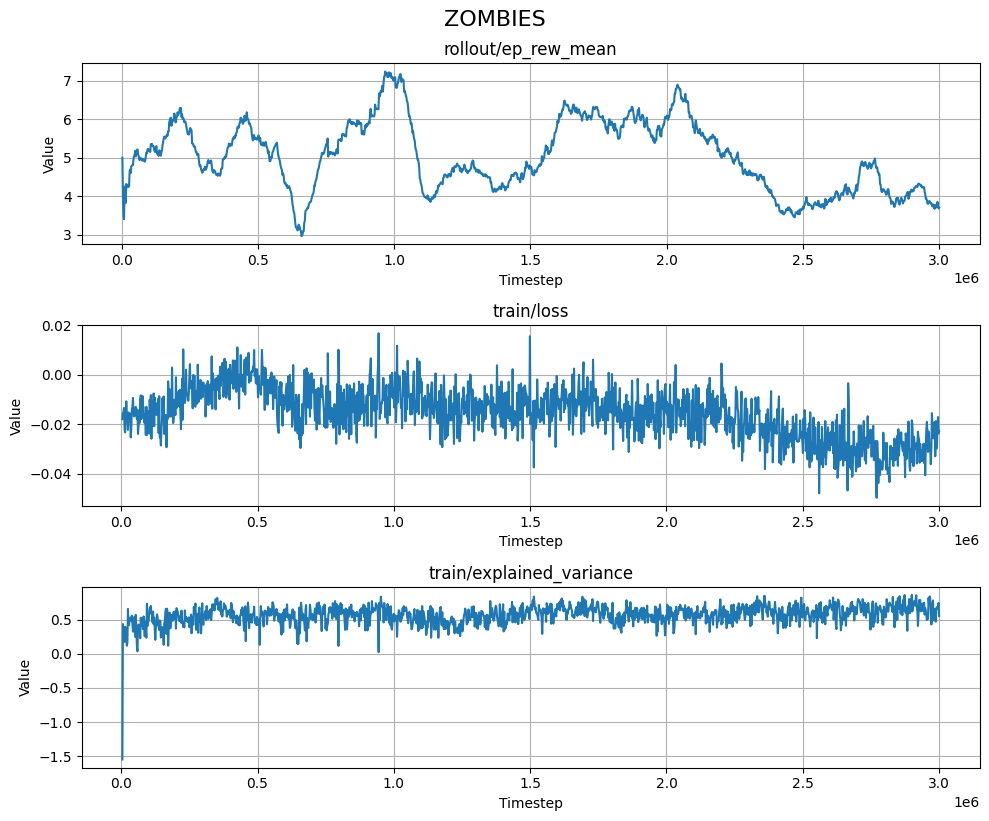

In [ ]:
draw('/content/tfevents_zombies.1', 'ZOMBIES')

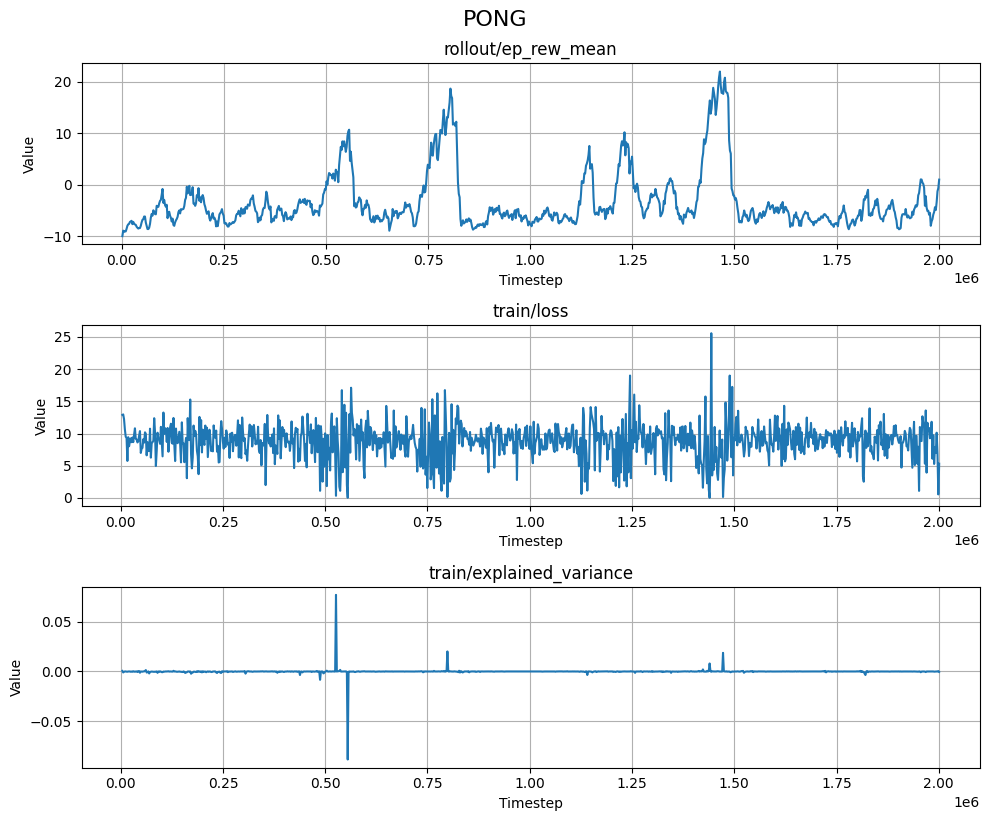

In [ ]:
draw('/content/tfevents_ppo_pong_2.0', 'PONG')